# Praktikum 3: Word Embeddings and Neural Language Models

Task 1: Word Embeddings
===============

For this exercise we are going to use pre-trained word embeddings. You
can find two different word embeddings models in

`/opt/data/vec/Wemb.en.filtered.lowered`  
`/opt/data/vec/GoogleNews-vectors-negative300.bin`

1)  In the appendix of this document you can find a visualization of
    some word embeddings extracted from a English and French machine
    translation model. Words are filtered under the topic "Research".

a)  Find at least three groups where you can see the similarity in
    meanings and mark them on the visualization. You can also check
    an English-French dictionary: <https://enfr.dict.cc/>.

2)  You are provided with 2 word vector files. The
    *Wemb.en.filtered.lowered* is a set of pre-trained 200-dimensional
    vectors for 10K English vocabulary, that we will mostly use for
    small experiments. The other file,
    *GoogleNews-vectors-negative300.bin* contains 3 million words. You
    can use it with the exercise if you want.

Word vectors represent semantic and syntactic relationships between
words. For example, *lady* should be closely related with *woman*.

a)  Examine the format of the embedding model file for the 10K
    English vocabulary.

In [1]:
embeddingmodel=/opt/data/vec/Wemb.en.filtered.lowered

head -2 $embeddingmodel

echo
echo -n 'Number of "words" per line: '
cat $embeddingmodel |
    grep lady | wc -w

echo -n 'Total number of lines: '
cat $embeddingmodel | wc -l

11752 200 
writing -0.05845778 -0.09190530 -0.02589424 -0.02522317 0.05366451 -0.03952653 -0.00876886 0.03060736 0.04896607 0.01564831 -0.02506016 0.07100761 -0.03507993 0.09870563 -0.03387290 0.03568781 0.07425486 -0.00165893 -0.01051492 -0.04607708 -0.09915169 -0.06194144 0.10198937 -0.05530214 0.06205470 0.04726395 -0.13273497 -0.07304158 -0.02790424 -0.02933407 -0.00978333 -0.00992418 0.08244192 0.00541691 -0.18403657 -0.00214179 0.04029832 -0.05896970 0.09990364 0.08532872 0.10725495 -0.04863238 -0.00867876 -0.02769790 0.00943092 0.01916903 -0.06149632 0.01232205 0.12028475 0.10385244 0.04235590 -0.03068192 0.07865627 0.13650553 0.00017261 -0.04942393 -0.08356978 -0.01325239 -0.04904098 -0.08419368 -0.00181666 -0.07562856 0.04355730 0.03737382 0.11111275 -0.01255314 -0.01916555 -0.05127316 -0.05650723 -0.12051325 -0.10272507 0.03867260 -0.04309317 0.05779719 0.04092875 0.04870337 -0.07637551 -0.04755736 0.09026353 0.05602673 -0.11934358 -0.01848558 -0.00194088 0.06600038 0.0473887

b)  Check vector values of the word *lady* and *woman*.

In [2]:
# we'll just look at the first few values, since the output is pretty hard to look at otherwise
cat $embeddingmodel |
    grep -e lady -e woman |
    cut -d' ' -f1-8 | column -t

lady   0.01361018  0.04732877  -0.00540839  -0.09349286  0.01137791  -0.03702742  -0.02019745
woman  0.07737311  0.04137088  -0.01775537  -0.13916844  0.07794968  -0.01941912  0.01003982


c) Write out the first 4 and the last values of the vectors in the table.

In [3]:
cat $embeddingmodel |
    grep -e lady -e woman |
    cut -d' ' -f1-5,201

lady 0.01361018 0.04732877 -0.00540839 -0.09349286 0.01850754
woman 0.07737311 0.04137088 -0.01775537 -0.13916844 -0.02679169


| word   |$v_0$ | $v_1$ | $v_2$ | $v_3$ | \... | $v_{199}$ |
|-------|-------|-------|-------|-------|------|-----------|
|lady   | 0.013 | 0.047 |-0.005 |-0.093 | \... |  0.019    |
|woman  | 0.077 | 0.041 |-0.017 |-0.139 | \... | -0.027    |


As you can see, it is hard for us to understand the vector
representation as it is. Therefore, we are going to calculate their
distance.

3)  We can check the similarity of the words by loading the vectors and
    calculating the distance between them, using

`$ vector.py {model}`  

a) What is the most similar word to the word *lady*? What is their similarity?

In [4]:
echo -e '1\nlady' |
    vector.py $embeddingmodel |&
    grep 'most similar to'

lady is most similar to.... [('woman', 0.63404780626297)]


b) Find the most similar word for following words and fill the table.

In [5]:
query=
for word in lady book mother school great tree
do
    query="${query}1\n$word\n"
done

echo -en "$query" |
    vector.py $embeddingmodel |&
    perl -lne '/(\w+) is most similar to\.+ \[\(\W(.*)\W, (.*)\)\]/ && print "| $1 | $2 | $3 |"' |
    column -t

|  lady    |  woman     |  0.63404780626297     |
|  book    |  magazine  |  0.6000742316246033   |
|  mother  |  mum       |  0.5940439701080322   |
|  school  |  college   |  0.5997563004493713   |
|  great   |  good      |  0.48894891142845154  |
|  tree    |  forest    |  0.5588597059249878   |


|Input word  |Most similar word  |Similarity  |
|------------|-------------------|------------|
|  lady    |  woman     |  0.63404780626297    |
|  book    |  magazine  |  0.600074291229248   |
|  mother  |  mum       |  0.594044029712677   |
|  school  |  college   |  0.5997563004493713  |
|  great   |  good      |  0.4889489412307739  |
|  tree    |  forest    |  0.5588597059249878  |

c)  Find the similarity score of following words and fill the table. When is the similarity score high?

In [6]:
query=
for word in "father dad" "human animal" "apple big" "soccer football"
do
    query="${query}2\n$word\n"
done

echo -en "$query" |
    vector.py $embeddingmodel |&
    perl -lne '/similarity between +(\w+) and (\w+) is\.+ (\S+)/ && print "| $1 | $2 | $3 |"' |
    column -t

|  father  |  dad       |  0.5393388    |
|  human   |  animal    |  0.2608136    |
|  apple   |  big       |  0.059935514  |
|  soccer  |  football  |  0.63188386   |


|word A  | word B   |similarity  |
|--------|----------|------------|
|  father  |  dad       |  0.5393388    |
|  human   |  animal    |  0.2608136    |
|  apple   |  big       |  0.059935518  |
|  soccer  |  football  |  0.63188386   |

d) Find the word which fits in the semantic relationship.

In [7]:
query=
for word in "man, husband, woman" "grass, green, sky" "tree, forest, water"
do
    query="${query}3\n$word\n"
done

echo -en "$query" |
    vector.py $embeddingmodel |&
    perl -lne '/(\w+) : (\w+) = (\w+) : \[\(\S(\w+)\S, \S+\)\]/ && print "| $1 | $2 | $3 | $4 |"' |
    column -t

|  man    |  husband  |  woman  |  wife   |
|  grass  |  green    |  sky    |  blue   |
|  tree   |  forest   |  water  |  ocean  |


------- --- --------- --- ------- --- --
  man    :   husband   =   woman   :  wife  
 grass   :    green    =    sky    :  blue  
 tree    :   forest    =   water   :  ocean   
------- --- --------- --- ------- --- --

4)  We can now repeat the above experiment using Google's 3 million
    vectors.  
    *Note*: loading the model might take a few minutes since the
    vocabulary size is so large.  

`$ vector.py /opt/data/vec/GoogleNews-vectors-negative300.bin`  

In [8]:
embeddingmodel=/opt/data/vec/GoogleNews-vectors-negative300.bin

a)  What is the most similar word to the word *lady*? What is their
    similarity?

In [9]:
echo -e '1\nlady' |
    vector.py $embeddingmodel |&
    grep 'most similar to'

lady is most similar to.... [('woman', 0.628878653049469)]


b)  Find the most similar word for following words and fill the
    table.

In [10]:
query=
for word in lady book mother school great tree
do
    query="${query}1\n$word\n"
done

echo -en "$query" |
    vector.py $embeddingmodel |&
    perl -lne '/(\w+) is most similar to\.+ \[\(\W(.*)\W, (.*)\)\]/ && print "| $1 | $2 | $3 |"' |
    column -t

|  lady    |  woman       |  0.628878653049469   |
|  book    |  tome        |  0.7485831379890442  |
|  mother  |  daughter    |  0.8706234097480774  |
|  school  |  elementary  |  0.7868632078170776  |
|  great   |  terrific    |  0.7989332675933838  |
|  tree    |  trees       |  0.8293121457099915  |


| Input word | Most similar word | Similarity |
|------------|-------------------|------------|
|  lady    |  woman       |  0.628878653049469   |
|  book    |  tome        |  0.7485831379890442  |
|  mother  |  daughter    |  0.8706234097480774  |
|  school  |  elementary  |  0.7868632078170776  |
|  great   |  terrific    |  0.7989332675933838  |
|  tree    |  trees       |  0.8293121457099915  |

c)  Find the similarity score of following words and fill the table.
    When is the similarity score high?

In [11]:
query=
for word in "father dad" "human animal" "apple big" "soccer football"
do
    query="${query}2\n$word\n"
done

echo -en "$query" |
    vector.py $embeddingmodel |&
    perl -lne '/similarity between +(\w+) and (\w+) is\.+ (\S+)/ && print "| $1 | $2 | $3 |"' |
    column -t

|  father  |  dad       |  0.8040657   |
|  human   |  animal    |  0.49877763  |
|  apple   |  big       |  0.07441682  |
|  soccer  |  football  |  0.73135483  |


| word A |  word B  | similarity |
|--------|----------|------------|
|  father  |  dad       |  0.8040657   |
|  human   |  animal    |  0.49877763  |
|  apple   |  big       |  0.07441682  |
|  soccer  |  football  |  0.73135483  |

d)  Find the word which fits in the semantic relationship.

In [12]:
query=
for word in "man, husband, woman" "grass, green, sky" "tree, forest, water" "king, queen, man" "paris, france, rome"
do
    query="${query}3\n$word\n"
done

echo -en "$query" |
    vector.py $embeddingmodel |&
    perl -lne '/(\w+) : (\w+) = (\w+) : \[\(\S(\w+)\S, \S+\)\]/ && print "| $1 | $2 | $3 | $4 |"' |
    column -t

|  man    |  husband  |  woman  |  mother       |
|  grass  |  green    |  sky    |  Flares_lit   |
|  tree   |  forest   |  water  |  groundwater  |
|  king   |  queen    |  man    |  woman        |
|  paris  |  france   |  rome   |  italy        |


------- --- --------- --- ------- --- --
  man    :   husband   =   woman   :  mother  
 grass   :    green    =    sky    :  Flares_lit  
 tree    :   forest    =   water   :  groundwater  
 king    :    queen    =    man    :  woman  
 paris   :   france    =   rome    :  italy  
------- --- --------- --- ------- --- --

Do you notice any difference between two vector spaces?
- the 3 million word embedding space has much higher word density
- neighbours are generally more similar to each other

Task 2: Neural Language Model
=====================

## 1.  Model Training

Since training a neural language model will take quite a while and
extensive computational resources, we will in the following provide
you with readily trained models, as well as the output of the
training scripts when they were trained.  
In the directory `/opt/data/lm/penn/saves.ptb` you will find a
couple of log files, which each save the logged output during the
training of a language model. The relevant log files are:

-   `small.log`: A small model without any regularization method.

-   `nodrop.log`: A big model without regularization.

-   `best.log`: A big model with dropout and dropconnect (two
    methods for regularization).

Look at the three `.log` files and answer the following questions:

a)  How is the perplexity of the training data changing across the
    training process?

In [13]:
cat /opt/data/lm/penn/saves.ptb/best.log

Model total parameters: 24221600
RNNModel(
  (lockdrop): LockedDropout()
  (idrop): Dropout(p=0.4)
  (hdrop): Dropout(p=0.25)
  (drop): Dropout(p=0.4)
  (encoder): Embedding(10000, 400)
  (rnns): ModuleList(
    (0): WeightDrop(
      (module): LSTM(400, 1150)
    )
    (1): WeightDrop(
      (module): LSTM(1150, 1150)
    )
    (2): WeightDrop(
      (module): LSTM(1150, 400)
    )
  )
  (decoder): Linear(in_features=1150, out_features=10000, bias=True)
)
| epoch   1 |   200/  663 batches | lr 30.00000 | ms/batch 62.08 | loss  7.07 | ppl  1170.42 | bpc   10.193
| epoch   1 |   400/  663 batches | lr 30.00000 | ms/batch 60.76 | loss  6.71 | ppl   824.30 | bpc    9.687
| epoch   1 |   600/  663 batches | lr 30.00000 | ms/batch 61.93 | loss  6.49 | ppl   658.72 | bpc    9.364
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 44.55s | valid loss  5.80 | valid ppl   329.10 | valid bpc    8.362
------------------------------

| epoch  13 |   600/  663 batches | lr 30.00000 | ms/batch 62.04 | loss  4.58 | ppl    97.20 | bpc    6.603
-----------------------------------------------------------------------------------------
| end of epoch  13 | time: 43.91s | valid loss  4.51 | valid ppl    90.59 | valid bpc    6.501
-----------------------------------------------------------------------------------------
Saving model (new best validation)
| epoch  14 |   200/  663 batches | lr 30.00000 | ms/batch 60.54 | loss  4.56 | ppl    95.52 | bpc    6.578
| epoch  14 |   400/  663 batches | lr 30.00000 | ms/batch 61.04 | loss  4.55 | ppl    94.75 | bpc    6.566
| epoch  14 |   600/  663 batches | lr 30.00000 | ms/batch 60.59 | loss  4.55 | ppl    94.33 | bpc    6.560
-----------------------------------------------------------------------------------------
| end of epoch  14 | time: 44.06s | valid loss  4.48 | valid ppl    88.13 | valid bpc    6.462
-------------------------------------------------------------------------

-----------------------------------------------------------------------------------------
| end of epoch  26 | time: 44.52s | valid loss  4.35 | valid ppl    77.29 | valid bpc    6.272
-----------------------------------------------------------------------------------------
Saving model (new best validation)
| epoch  27 |   200/  663 batches | lr 30.00000 | ms/batch 62.05 | loss  4.31 | ppl    74.79 | bpc    6.225
| epoch  27 |   400/  663 batches | lr 30.00000 | ms/batch 61.34 | loss  4.31 | ppl    74.51 | bpc    6.219
| epoch  27 |   600/  663 batches | lr 30.00000 | ms/batch 62.20 | loss  4.31 | ppl    74.23 | bpc    6.214
-----------------------------------------------------------------------------------------
| end of epoch  27 | time: 44.46s | valid loss  4.35 | valid ppl    77.23 | valid bpc    6.271
-----------------------------------------------------------------------------------------
Saving model (new best validation)
| epoch  28 |   200/  663 batches | lr 30.00000 | ms/bat

| end of epoch  39 | time: 43.93s | valid loss  4.30 | valid ppl    73.51 | valid bpc    6.200
-----------------------------------------------------------------------------------------
| epoch  40 |   200/  663 batches | lr 30.00000 | ms/batch 61.79 | loss  4.19 | ppl    66.04 | bpc    6.045
| epoch  40 |   400/  663 batches | lr 30.00000 | ms/batch 60.60 | loss  4.19 | ppl    65.93 | bpc    6.043
| epoch  40 |   600/  663 batches | lr 30.00000 | ms/batch 61.39 | loss  4.19 | ppl    65.93 | bpc    6.043
-----------------------------------------------------------------------------------------
| end of epoch  40 | time: 44.55s | valid loss  4.29 | valid ppl    72.72 | valid bpc    6.184
-----------------------------------------------------------------------------------------
Saving model (new best validation)
| epoch  41 |   200/  663 batches | lr 30.00000 | ms/batch 60.45 | loss  4.18 | ppl    65.14 | bpc    6.026
| epoch  41 |   400/  663 batches | lr 30.00000 | ms/batch 60.83 | loss  

Saving Averaged!
| epoch  53 |   200/  663 batches | lr 30.00000 | ms/batch 64.49 | loss  4.10 | ppl    60.20 | bpc    5.912
| epoch  53 |   400/  663 batches | lr 30.00000 | ms/batch 63.18 | loss  4.10 | ppl    60.17 | bpc    5.911
| epoch  53 |   600/  663 batches | lr 30.00000 | ms/batch 62.45 | loss  4.10 | ppl    60.40 | bpc    5.917
-----------------------------------------------------------------------------------------
| end of epoch  53 | time: 45.89s | valid loss  4.21 | valid ppl    67.16 | valid bpc    6.069
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch  54 |   200/  663 batches | lr 30.00000 | ms/batch 62.45 | loss  4.11 | ppl    61.03 | bpc    5.931
| epoch  54 |   400/  663 batches | lr 30.00000 | ms/batch 63.38 | loss  4.10 | ppl    60.35 | bpc    5.915
| epoch  54 |   600/  663 batches | lr 30.00000 | ms/batch 63.37 | loss  4.10 | ppl    60.42 | bpc    5.917
-------------------------------------------

| epoch  66 |   600/  663 batches | lr 30.00000 | ms/batch 62.58 | loss  4.05 | ppl    57.38 | bpc    5.843
-----------------------------------------------------------------------------------------
| end of epoch  66 | time: 45.32s | valid loss  4.18 | valid ppl    65.62 | valid bpc    6.036
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch  67 |   200/  663 batches | lr 30.00000 | ms/batch 62.94 | loss  4.05 | ppl    57.22 | bpc    5.839
| epoch  67 |   400/  663 batches | lr 30.00000 | ms/batch 62.38 | loss  4.04 | ppl    57.01 | bpc    5.833
| epoch  67 |   600/  663 batches | lr 30.00000 | ms/batch 62.03 | loss  4.05 | ppl    57.25 | bpc    5.839
-----------------------------------------------------------------------------------------
| end of epoch  67 | time: 45.42s | valid loss  4.18 | valid ppl    65.55 | valid bpc    6.035
-----------------------------------------------------------------------------------------
S

| end of epoch  79 | time: 45.90s | valid loss  4.17 | valid ppl    64.93 | valid bpc    6.021
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch  80 |   200/  663 batches | lr 30.00000 | ms/batch 63.56 | loss  4.00 | ppl    54.84 | bpc    5.777
| epoch  80 |   400/  663 batches | lr 30.00000 | ms/batch 63.00 | loss  4.00 | ppl    54.42 | bpc    5.766
| epoch  80 |   600/  663 batches | lr 30.00000 | ms/batch 62.03 | loss  4.00 | ppl    54.55 | bpc    5.769
-----------------------------------------------------------------------------------------
| end of epoch  80 | time: 45.45s | valid loss  4.17 | valid ppl    64.88 | valid bpc    6.020
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch  81 |   200/  663 batches | lr 30.00000 | ms/batch 62.73 | loss  3.99 | ppl    54.16 | bpc    5.759
| epoch  81 |   400/  663 batches | lr 30.00000 | ms/batch 62.60 | loss  3

Saving Averaged!
| epoch  93 |   200/  663 batches | lr 30.00000 | ms/batch 63.17 | loss  3.95 | ppl    51.98 | bpc    5.700
| epoch  93 |   400/  663 batches | lr 30.00000 | ms/batch 62.80 | loss  3.95 | ppl    52.03 | bpc    5.701
| epoch  93 |   600/  663 batches | lr 30.00000 | ms/batch 62.91 | loss  3.95 | ppl    52.20 | bpc    5.706
-----------------------------------------------------------------------------------------
| end of epoch  93 | time: 45.63s | valid loss  4.16 | valid ppl    64.35 | valid bpc    6.008
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch  94 |   200/  663 batches | lr 30.00000 | ms/batch 62.82 | loss  3.96 | ppl    52.36 | bpc    5.710
| epoch  94 |   400/  663 batches | lr 30.00000 | ms/batch 62.31 | loss  3.96 | ppl    52.26 | bpc    5.708
| epoch  94 |   600/  663 batches | lr 30.00000 | ms/batch 62.33 | loss  3.96 | ppl    52.27 | bpc    5.708
-------------------------------------------

| epoch 106 |   600/  663 batches | lr 30.00000 | ms/batch 62.75 | loss  3.93 | ppl    50.71 | bpc    5.664
-----------------------------------------------------------------------------------------
| end of epoch 106 | time: 45.42s | valid loss  4.16 | valid ppl    63.95 | valid bpc    5.999
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch 107 |   200/  663 batches | lr 30.00000 | ms/batch 63.52 | loss  3.93 | ppl    50.95 | bpc    5.671
| epoch 107 |   400/  663 batches | lr 30.00000 | ms/batch 62.19 | loss  3.92 | ppl    50.50 | bpc    5.658
| epoch 107 |   600/  663 batches | lr 30.00000 | ms/batch 62.08 | loss  3.93 | ppl    50.77 | bpc    5.666
-----------------------------------------------------------------------------------------
| end of epoch 107 | time: 45.34s | valid loss  4.16 | valid ppl    63.93 | valid bpc    5.998
-----------------------------------------------------------------------------------------
S

| end of epoch 119 | time: 45.41s | valid loss  4.15 | valid ppl    63.60 | valid bpc    5.991
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch 120 |   200/  663 batches | lr 30.00000 | ms/batch 63.30 | loss  3.91 | ppl    49.96 | bpc    5.643
| epoch 120 |   400/  663 batches | lr 30.00000 | ms/batch 62.98 | loss  3.90 | ppl    49.56 | bpc    5.631
| epoch 120 |   600/  663 batches | lr 30.00000 | ms/batch 62.81 | loss  3.90 | ppl    49.62 | bpc    5.633
-----------------------------------------------------------------------------------------
| end of epoch 120 | time: 45.20s | valid loss  4.15 | valid ppl    63.57 | valid bpc    5.990
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch 121 |   200/  663 batches | lr 30.00000 | ms/batch 63.07 | loss  3.91 | ppl    49.66 | bpc    5.634
| epoch 121 |   400/  663 batches | lr 30.00000 | ms/batch 63.00 | loss  3

Saving Averaged!
| epoch 133 |   200/  663 batches | lr 30.00000 | ms/batch 62.97 | loss  3.88 | ppl    48.23 | bpc    5.592
| epoch 133 |   400/  663 batches | lr 30.00000 | ms/batch 61.92 | loss  3.87 | ppl    48.07 | bpc    5.587
| epoch 133 |   600/  663 batches | lr 30.00000 | ms/batch 62.52 | loss  3.88 | ppl    48.23 | bpc    5.592
-----------------------------------------------------------------------------------------
| end of epoch 133 | time: 45.48s | valid loss  4.15 | valid ppl    63.28 | valid bpc    5.984
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch 134 |   200/  663 batches | lr 30.00000 | ms/batch 63.28 | loss  3.87 | ppl    47.95 | bpc    5.584
| epoch 134 |   400/  663 batches | lr 30.00000 | ms/batch 61.85 | loss  3.87 | ppl    47.89 | bpc    5.582
| epoch 134 |   600/  663 batches | lr 30.00000 | ms/batch 62.02 | loss  3.88 | ppl    48.32 | bpc    5.595
-------------------------------------------

| epoch 146 |   600/  663 batches | lr 30.00000 | ms/batch 61.66 | loss  3.86 | ppl    47.41 | bpc    5.567
-----------------------------------------------------------------------------------------
| end of epoch 146 | time: 45.28s | valid loss  4.14 | valid ppl    63.02 | valid bpc    5.978
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch 147 |   200/  663 batches | lr 30.00000 | ms/batch 63.81 | loss  3.86 | ppl    47.49 | bpc    5.570
| epoch 147 |   400/  663 batches | lr 30.00000 | ms/batch 63.66 | loss  3.86 | ppl    47.27 | bpc    5.563
| epoch 147 |   600/  663 batches | lr 30.00000 | ms/batch 62.50 | loss  3.86 | ppl    47.45 | bpc    5.568
-----------------------------------------------------------------------------------------
| end of epoch 147 | time: 45.37s | valid loss  4.14 | valid ppl    63.00 | valid bpc    5.977
-----------------------------------------------------------------------------------------
S

| end of epoch 159 | time: 45.85s | valid loss  4.14 | valid ppl    62.81 | valid bpc    5.973
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch 160 |   200/  663 batches | lr 30.00000 | ms/batch 62.79 | loss  3.83 | ppl    46.26 | bpc    5.532
| epoch 160 |   400/  663 batches | lr 30.00000 | ms/batch 61.96 | loss  3.84 | ppl    46.35 | bpc    5.535
| epoch 160 |   600/  663 batches | lr 30.00000 | ms/batch 62.72 | loss  3.84 | ppl    46.69 | bpc    5.545
-----------------------------------------------------------------------------------------
| end of epoch 160 | time: 45.27s | valid loss  4.14 | valid ppl    62.80 | valid bpc    5.973
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch 161 |   200/  663 batches | lr 30.00000 | ms/batch 62.84 | loss  3.85 | ppl    47.02 | bpc    5.555
| epoch 161 |   400/  663 batches | lr 30.00000 | ms/batch 62.61 | loss  3

Saving Averaged!
| epoch 173 |   200/  663 batches | lr 30.00000 | ms/batch 62.77 | loss  3.84 | ppl    46.39 | bpc    5.536
| epoch 173 |   400/  663 batches | lr 30.00000 | ms/batch 64.03 | loss  3.83 | ppl    46.15 | bpc    5.528
| epoch 173 |   600/  663 batches | lr 30.00000 | ms/batch 61.43 | loss  3.83 | ppl    46.22 | bpc    5.531
-----------------------------------------------------------------------------------------
| end of epoch 173 | time: 45.31s | valid loss  4.14 | valid ppl    62.62 | valid bpc    5.968
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch 174 |   200/  663 batches | lr 30.00000 | ms/batch 62.74 | loss  3.83 | ppl    46.01 | bpc    5.524
| epoch 174 |   400/  663 batches | lr 30.00000 | ms/batch 62.67 | loss  3.82 | ppl    45.70 | bpc    5.514
| epoch 174 |   600/  663 batches | lr 30.00000 | ms/batch 62.77 | loss  3.83 | ppl    46.00 | bpc    5.524
-------------------------------------------

| epoch 186 |   600/  663 batches | lr 30.00000 | ms/batch 63.37 | loss  3.82 | ppl    45.50 | bpc    5.508
-----------------------------------------------------------------------------------------
| end of epoch 186 | time: 45.07s | valid loss  4.13 | valid ppl    62.46 | valid bpc    5.965
-----------------------------------------------------------------------------------------
Saving Averaged!
| epoch 187 |   200/  663 batches | lr 30.00000 | ms/batch 64.23 | loss  3.82 | ppl    45.39 | bpc    5.504
| epoch 187 |   400/  663 batches | lr 30.00000 | ms/batch 63.78 | loss  3.81 | ppl    45.15 | bpc    5.497
| epoch 187 |   600/  663 batches | lr 30.00000 | ms/batch 63.80 | loss  3.81 | ppl    45.33 | bpc    5.502
-----------------------------------------------------------------------------------------
| end of epoch 187 | time: 45.96s | valid loss  4.13 | valid ppl    62.45 | valid bpc    5.965
-----------------------------------------------------------------------------------------
S

In [14]:
cat /opt/data/lm/penn/saves.ptb/best.log |
    perl -lne '/valid ppl/ && next; /ppl +(\S+) / && print $1'

# for logfile in /opt/data/lm/penn/saves.ptb/*.log
# do
#     logname=$(basename $logfile)
#     logname=${logname%%.log}
#     perl -ne '/valid ppl/ && next; /ppl +(\S+) / && print $1, " "' < $logfile > /tmp/training-ppls-${logname}.txt
# done

1170.42
824.30
658.72
325.18
304.76
286.99
228.43
221.66
214.12
187.13
184.63
180.18
165.46
163.10
159.65
147.79
145.90
143.85
134.04
133.38
131.88
125.74
124.50
122.94
117.54
116.33
115.17
111.95
110.66
109.55
105.78
105.37
104.86
102.99
101.82
101.21
98.46
97.57
97.20
95.52
94.75
94.33
92.96
91.49
91.52
90.23
90.14
89.38
88.99
87.97
87.73
87.28
85.62
85.54
84.15
83.97
83.61
83.15
82.32
82.15
81.14
80.98
81.05
79.73
79.39
79.30
78.13
78.09
77.94
77.75
77.41
77.22
76.34
76.20
76.08
75.49
74.58
74.53
74.79
74.51
74.23
73.66
73.32
73.20
73.26
72.76
72.37
72.10
71.91
71.75
70.52
70.86
70.84
70.15
70.18
70.22
69.84
69.25
69.42
69.20
68.93
68.99
68.13
67.90
67.93
68.12
68.02
67.97
67.97
67.53
67.41
66.66
66.27
66.46
65.97
65.84
65.91
66.04
65.93
65.93
65.14
65.31
65.22
65.00
64.76
64.80
64.29
63.79
64.00
63.59
63.59
63.78
64.00
63.92
63.56
63.33
62.85
62.70
63.00
62.58
62.48
62.33
62.07
62.16
62.09
61.55
61.69
61.78
61.36
61.39
60.89
60.88
61.10
60.76
60.58
60.78
60.20
60.17
60.40
61.03
60.

b)  Compare the training speeds between `small.log` and
    `nodrop.log`.

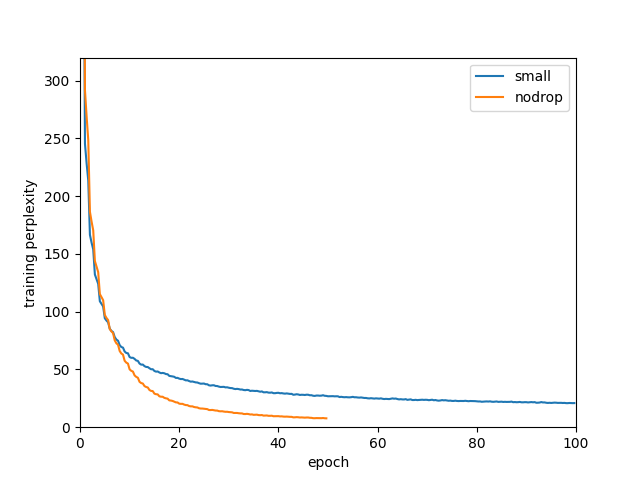

In [15]:
logdir=/opt/data/lm/penn/saves.ptb

get_training_ppls() {
    cat $logdir/$1.log |
        perl -ne '/valid ppl/ && next; /ppl +([0-9.]+) / && print $1, ","' # < $1
}

# here we have some Perl nested in a Bash function, nested in inline Python, nested in Bash...
# I wonder whether there's some code injection vulnerability somewhere in there
python3 << EOF | display
from matplotlib import pyplot as plt
import sys

yvals = [$(get_training_ppls small)]
xvals = [x/3 for x in range(len(yvals))]
handle_small, = plt.plot(xvals, yvals, label="small")
yvals = [$(get_training_ppls nodrop)]
xvals = [x/3 for x in range(len(yvals))]
handle_nodrop, = plt.plot(xvals, yvals, label="nodrop")
plt.legend(handles=[handle_small, handle_nodrop])
plt.xlim(0,100)
plt.ylim(0,320)
plt.xlabel('epoch')
plt.ylabel('training perplexity')
plt.savefig(sys.stdout)
EOF

c)  Look at the validation perplexities. How are they changing
    across files?

In [16]:
cat /opt/data/lm/penn/saves.ptb/best.log |
    perl -lne '/valid ppl +(\S+) / && print $1'

# for logfile in /opt/data/lm/penn/saves.ptb/*.log
# do
#     logname=$(basename $logfile)
#     logname=${logname%%.log}
#     perl -ne '/valid ppl +(\S+) / && print $1, " "' < $logfile > /tmp/valid-ppls-${logname}.txt
# done

329.10
210.05
192.61
145.94
134.84
119.21
112.46
105.92
101.31
97.24
95.24
92.40
90.59
88.13
86.52
87.30
83.64
83.79
82.02
81.85
80.99
80.34
79.49
78.81
78.03
77.29
77.23
77.43
76.64
76.02
76.05
75.13
75.78
74.95
74.90
74.42
73.96
73.41
73.51
72.72
72.93
72.54
72.71
72.46
72.71
71.93
71.51
71.61
71.35
71.41
73.82
67.48
67.16
66.93
66.67
66.51
66.37
66.26
66.15
66.06
65.98
65.91
65.84
65.77
65.69
65.62
65.55
65.50
65.44
65.38
65.32
65.27
65.22
65.16
65.12
65.06
65.02
64.97
64.93
64.88
64.84
64.79
64.75
64.70
64.66
64.61
64.57
64.53
64.50
64.46
64.42
64.39
64.35
64.32
64.29
64.26
64.23
64.20
64.17
64.14
64.11
64.07
64.04
64.01
63.98
63.95
63.93
63.90
63.87
63.84
63.81
63.78
63.75
63.73
63.70
63.67
63.65
63.62
63.60
63.57
63.55
63.53
63.51
63.48
63.46
63.44
63.41
63.39
63.37
63.34
63.32
63.30
63.28
63.26
63.23
63.21
63.19
63.17
63.15
63.13
63.11
63.09
63.08
63.06
63.04
63.02
63.00
62.99
62.97
62.95
62.94
62.92
62.91
62.89
62.87
62.86
62.84
62.83
62.81
62.80
62.78
62.77
62.75
62.74
62.72
6

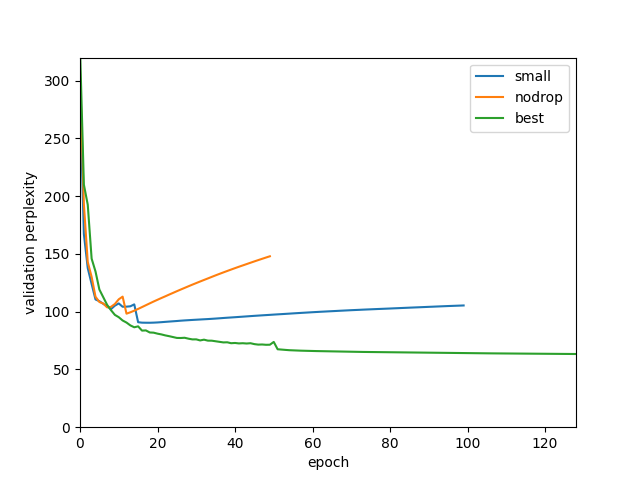

In [17]:
get_valid_ppls() {
    cat $logdir/$1.log |
        perl -ne '/valid ppl +([0-9.]+) / && print $1, ","' # < $1
}

python3 << EOF | display
from matplotlib import pyplot as plt
import sys

yvals = [$(get_valid_ppls small)]
xvals = [x for x in range(len(yvals))]
handle_small, = plt.plot(xvals, yvals, label="small")
yvals = [$(get_valid_ppls nodrop)]
xvals = [x for x in range(len(yvals))]
handle_nodrop, = plt.plot(xvals, yvals, label="nodrop")
yvals = [$(get_valid_ppls best)]
xvals = [x for x in range(len(yvals))]
handle_best, = plt.plot(xvals, yvals, label="best")
plt.legend(handles=[handle_small, handle_nodrop, handle_best])
plt.xlim(0,128)
plt.ylim(0,320)
plt.xlabel('epoch')
plt.ylabel('validation perplexity')
plt.savefig(sys.stdout)
EOF

d)  Same for the training perplexities.

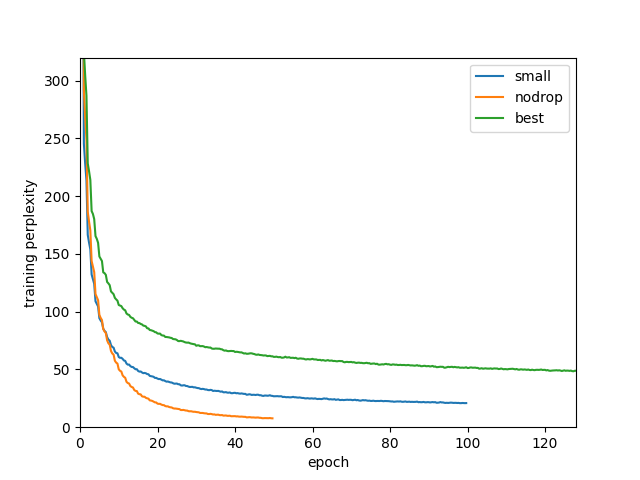

In [18]:
python3 << EOF | display
from matplotlib import pyplot as plt
import sys

yvals = [$(get_training_ppls small)]
xvals = [x/3 for x in range(len(yvals))]
handle_small, = plt.plot(xvals, yvals, label="small")
yvals = [$(get_training_ppls nodrop)]
xvals = [x/3 for x in range(len(yvals))]
handle_nodrop, = plt.plot(xvals, yvals, label="nodrop")
yvals = [$(get_training_ppls best)]
xvals = [x/3 for x in range(len(yvals))]
handle_best, = plt.plot(xvals, yvals, label="best")
plt.legend(handles=[handle_small, handle_nodrop, handle_best])
plt.xlim(0,128)
plt.ylim(0,320)
plt.xlabel('epoch')
plt.ylabel('training perplexity')
plt.savefig(sys.stdout)
EOF

## 2.  Computing Perplexity of Unseen Data

You can then try to compute the perplexity of the test data located
at `/opt/data/lm/penn/test.txt`.  
`perplexity.py --help` will give you the required options to
proceed.  

a)  Provided the three different pre-trained models, can you compute
    the test perplexity of each of them?

*Note*: There will be a bunch of `SourceChangeWarning`s which you
can safely ignore

In [19]:
perplexity.py --help

usage: perplexity.py [-h] [--train TRAIN] [--test TEST] [--model MODEL]
                     [--checkpoint CHECKPOINT] [--seed SEED] [--cuda]
                     [--batch_size BATCH_SIZE] [--output_file OUTPUT_FILE]
                     [--log-interval LOG_INTERVAL] [--reset_sentence]

PyTorch PTB Language Model

optional arguments:
  -h, --help            show this help message and exit
  --train TRAIN         location of the data corpus
  --test TEST           location of the data corpus
  --model MODEL         type of recurrent net (LSTM, QRNN)
  --checkpoint CHECKPOINT
                        model checkpoint to use
  --seed SEED           random seed
  --cuda                use CUDA
  --batch_size BATCH_SIZE
                        batch size to use
  --output_file OUTPUT_FILE
                        location of output file for each sentence
  --log-interval LOG_INTERVAL
                        reporting interval
  --reset_sentence      reset hidden state after each sentence


In [1]:
perplexity.py \
    --cuda --batch_size 32 \
    --checkpoint /opt/data/lm/penn/saves.ptb/PTB.pt \
    --train /opt/data/lm/penn/train.txt \
    --test /opt/data/lm/penn/test.txt

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.dropout.Dropout' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.sparse.Embedding' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or

## 3.  Generating new Data from the Model

A nice thing about the neural language model is that it can easily
be used as a generational model, e. g. it can generate new data.  
`generate.py` will help you generate new sentences from a model that
we trained on 1 million words of Wikipedia text. After you start the
program you can give it a prefix, and it will generate a
continuation, e. g. supplying *"the meaning of life is"* as input
will generate a sentence starting with this input.

Take a look at the output generated by the model. Can you assess the
quality of the generated sentences?

a)  Are they grammatically correct?

In [7]:
echo "the meaning of life is" |
    generate.py \
    --cuda \
    --checkpoint /opt/data/lm/penn/saves.ptb/PTB.pt \
    --data /opt/data/lm/penn 2>/dev/null |
    sed 's/ <eos> /\n/g'

Enter your input (lower-cased :)):the meaning of life is completed
why would they have that N N of the the compensate and underwear dishonesty which measured the existence
of the new drugs
sexual seizures which are the black
investigations doubt solicitation question whether liberals are high
families
british air was critical to the dominant to australia 's dreyfus electronics corp. decade against singer v. pearce
saying the N N stakes in the u.s. have leo growers of interviews with government and a joint-venture ad more
advertisers think about south carolina 's ideal struggle over the N years of afternoon and the doldrums of press purchases
in government that 's an eroded waiver
the alongside state savings and loan association was a one-hour position and
not in new york
declined to comment on the suit and the two partners regard the hung career although
in the anticipated program higher profit challenges advantages from the telephone business and concerning for allegations which want 

b)  Can you find any semantic connection between sentences/phrases
    being generated?
  - topic and words in the output resembles something that might be found in a Wikipedia article
  - model has very short "attention span"
  - sentences aren't coherent, content keeps changing topics every few words
  - the LSTM fails to model long range dependencies